The cold plasma dielectric tensor is defined as :
$$
\mathbf{K}
=
\left(
\begin{array}{ccc}
S & j D & 0 \\
-j D & S & 0 \\
0 & 0 & P
\end{array}
\right)
$$
where
$$
\begin{eqnarray}
S &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
D &=& \sum_s \frac{\Omega_{c,s}}{\omega} \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
P &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2}
\end{eqnarray}
$$

where $\omega$ is the RF angular frequency ($\omega=2\pi f$) and $\Omega_{c,s}$, $\omega_{p,s}$ are the cyclotron and the plasma  angular frequencies respectively for the plasma species $s$. 

In [1]:
import sys
# import the (git version of) PlasmaPy module which is not my global python path
sys.path.append('../../PlasmaPy')
from plasmapy.physics.dielectric import cold_plasma_permittivity_SDP
from astropy import units as u
from plasmapy.constants import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, c, epsilon_0, mu_0, m_e, m_p, pi

In [2]:
# RF angular Frequency
omega_RF = 2*pi*50e6*(u.rad/u.s) # pay attention to the unit in rad/s!
# Electron and ion density
ns = [1e18, 1e18]/u.m**3
# Magnetic field
B0 = 2*u.T

S, D, P = cold_plasma_permittivity_SDP(B=B0, species=['e', 'D+'], n=ns, omega=omega_RF)
print(S, D, P)

-8.661091784715325 31.754325333352067 -32254.33974279528


In [3]:
# Plot the S,D,P coefficients vs density at the edge (supposed constant first), for various magnetic field
ns = np.logspace(17, 19, 50)/u.m**3 
Bs = [2, 4]*u.T

In [4]:
S_B1, D_B1, P_B1 = cold_plasma_permittivity_SDP(B=Bs[0], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)
S_B2, D_B2, P_B2 = cold_plasma_permittivity_SDP(B=Bs[1], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)

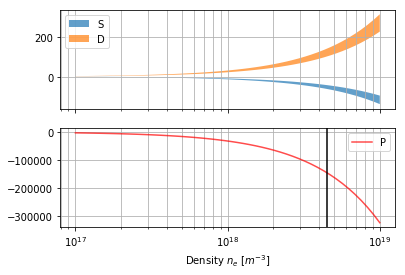

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].fill_between(ns, S_B1, S_B2, alpha=0.7)
ax[0].fill_between(ns, D_B1, D_B2, alpha=0.7)
ax[0].set_xscale('log')
ax[0].legend( ['S', 'D'], loc='upper left')
ax[0].grid(True)
ax[0].grid(True, which='minor')

ax[1].plot(ns, P_B1, alpha=0.7, color='r')
ax[1].set_xscale('log')
ax[1].legend(['P'])
ax[1].grid(True)
ax[1].grid(True, which='minor')
ax[1].set_xlabel('Density $n_e$ [$m^{-3}$]')
ax[1].axvline(4.5e18, color='k')

In [36]:
%matplotlib notebook

<IPython.core.display.Javascript object>


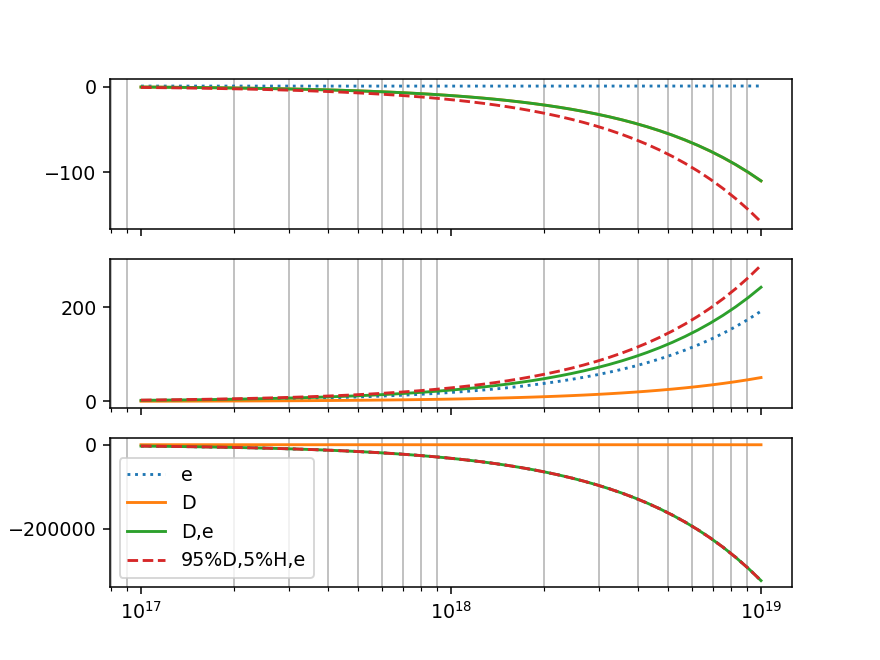

In [48]:
# what difference in the ICRF range for S, D, P depending if we consider a single species plasma or a mixture ?
omega_RF = 50e6*2*pi*u.rad/u.s
fig, ax = plt.subplots(3, 1, sharex=True)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['e'], n=[ns], omega=omega_RF)
ax[0].plot(ns, S, ':')
ax[1].plot(ns, D, ':')
ax[2].plot(ns, P, ':')

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+'], n=[ns], omega=omega_RF)
ax[0].plot(ns, S)
ax[1].plot(ns, D)
ax[2].plot(ns, P)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'e'], n=[ns, ns], omega=omega_RF)
ax[0].plot(ns, S)
ax[1].plot(ns, D)
ax[2].plot(ns, P)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ns, 0.05*ns, ns], omega=omega_RF)
ax[0].plot(ns, S, '--')
ax[1].plot(ns, D, '--')
ax[2].plot(ns, P, '--')

[a.set_xscale('log') for a in ax]
[a.grid(True, which='minor') for a in ax]
ax[2].legend(('e', 'D', 'D,e', '95%D,5%H,e'))



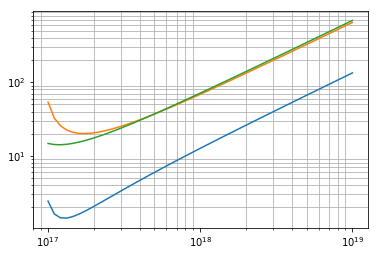

In [31]:

k0 = omega_RF/c
kz = 0

fig, ax = plt.subplots()

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+'], n=[ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'e'], n=[ns, ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ns, 0.05*ns, ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, which='minor')

In [14]:
S-D

<Quantity [  -0.91881026,   -1.10789201,   -1.3156061 ,   -1.54378857,
             -1.7944564 ,   -2.06982532,   -2.37232942,   -2.70464261,
             -3.06970232,   -3.47073544,   -3.91128681,   -4.39525062,
             -4.92690478,   -5.51094874,   -6.15254507,   -6.85736503,
             -7.63163875,   -8.48221029,   -9.41659812,  -10.4430616 ,
            -11.57067395,  -12.80940252,  -14.17019682,  -15.66508533,
            -17.30728187,  -19.11130234,  -21.09309304,  -23.27017165,
            -25.66178209,  -28.28906454,  -31.17524241,  -34.34582754,
            -37.82884575,  -41.65508455,  -45.85836529,  -50.47584212,
            -55.54833039,  -61.12066744,  -67.24210895,  -73.9667643 ,
            -81.35407486,  -89.46933945,  -98.38429147, -108.17773305,
           -118.93623155, -130.75488477, -143.73816157, -158.00082531,
           -173.66894821, -190.88102583]>

In [7]:
ne = 5e18/u.m**3
S_, D_, P_ = cold_plasma_permittivity_SDP(B=3*u.T, species=['e', 'D+'], n=[ne], omega=omega_RF)
print(S_, D_, P_)

1.057156800184015 95.99766971742896 -161231.77185929762


In [8]:
omega_rf = 2*pi*50e6
ne = 10e18
B0 = 3

omega_pe = sqrt(ne*e**2/m_e/epsilon_0)
omega_pi_D = sqrt(0.95*ne*e**2/m_p/epsilon_0) 
omega_pi_H = sqrt(0.05*ne*e**2/m_p/epsilon_0) 

omega_ce = - e*B0/m_e
omega_ci_D = + e*B0/m_p

S = 1 - omega_pe**2/(omega_rf**2-omega_ce**2) \
    - omega_pi_D**2/(omega_rf**2-omega_ci_D**2) \
   # - omega_pi_H**2/(omega_rf**2-omega_ci_D**2)
print(S)

NameError: name 'sqrt' is not defined